

# Lab11: Modulation and sampling



In [1]:
# Get thinkdsp.py

import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

--2022-04-14 10:33:03--  https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py [following]
--2022-04-14 10:33:04--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48687 (48K) [text/plain]
Saving to: ‘thinkdsp.py’

thinkdsp.py         100%[===================>]  47.55K  --.-KB/s    in 0.006s  

2022-04-14 10:33:04 (7.30 MB/s) - ‘thinkdsp.py’ saved [48687/48687]



In [2]:
import numpy as np
import matplotlib.pyplot as plt

from thinkdsp import decorate

## Exercise 1

При взятии выборок из сигнала при слишком низкой чистоте кадров составляющие, большие частоты заворота дадут биения. В таком случаее эти компоненты не отфильтруешь, посколько они неотличимы от более низких частот. Полезно отфильтровать эти частоты до выборки: фильтр НЧ, используемый для этой цели, называется фильтром сглаживания. Вернитесь к примеру "Соло на барабане", примените фильтр НЧ до выборки, а затем, опять с помощью фильтра НЧ, удалите спектральные копии, вызванные выборкой. Результат должен быть идентицент  отфильтрованному сигналу.

In [3]:
if not os.path.exists('263868__kevcio__amen-break-a-160-bpm.wav'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/263868__kevcio__amen-break-a-160-bpm.wav

--2022-04-14 10:37:33--  https://github.com/AllenDowney/ThinkDSP/raw/master/code/263868__kevcio__amen-break-a-160-bpm.wav
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/263868__kevcio__amen-break-a-160-bpm.wav [following]
--2022-04-14 10:37:33--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/263868__kevcio__amen-break-a-160-bpm.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1058544 (1.0M) [audio/wav]
Saving to: ‘263868__kevcio__amen-break-a-160-bpm.wav’

263868__kevcio__ame 100%[===================>]   1.01M  --.-KB/s    in 0.03s   

20

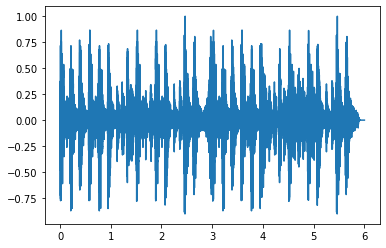

In [4]:
from thinkdsp import read_wave

wave = read_wave('263868__kevcio__amen-break-a-160-bpm.wav')
wave.plot()

In [5]:
wave.framerate

44100

In [6]:
wave.make_audio()

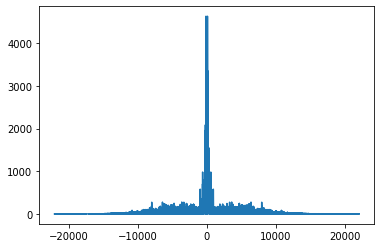

In [22]:
spectrum = wave.make_spectrum(full=True)
spectrum.plot()

Фильтр НЧ:

In [26]:
factor = 3
framerate = wave.framerate / factor
cutoff = framerate / 2 - 1

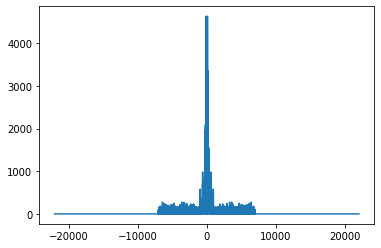

In [23]:
spectrum.low_pass(cutoff)
spectrum.plot()

In [24]:
filtered = spectrum.make_wave()
filtered.make_audio()

Функция из `chap11.ipynb`:

In [28]:
from thinkdsp import Wave

def sample(wave, factor):
    """Simulates sampling of a wave.
    
    wave: Wave object
    factor: ratio of the new framerate to the original
    """
    ys = np.zeros(len(wave))
    ys[::factor] = wave.ys[::factor]
    return Wave(ys, framerate=wave.framerate) 

In [29]:
sampled = sample(filtered, factor)
sampled.make_audio()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  # Remove the CWD from sys.path while we load stuff.


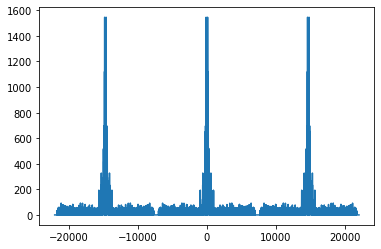

In [38]:
sampled_spectrum = sampled.make_spectrum(full=True)
sampled_spectrum.plot()

Избавляемся от спектральных копий:

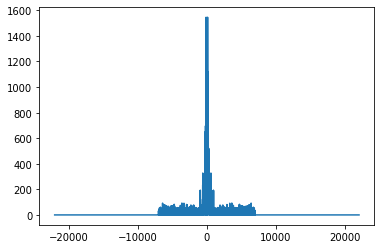

In [39]:
sampled_spectrum.low_pass(cutoff)
sampled_spectrum.plot()

Звуки отличаются:

In [40]:
interpolated = sampled_spectrum.make_wave()
interpolated.make_audio()

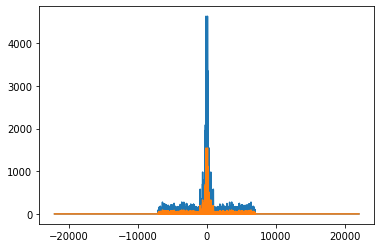

In [41]:
spectrum.plot()
sampled_spectrum.plot()

Надо увеличить ампилитуду в 3 раза:

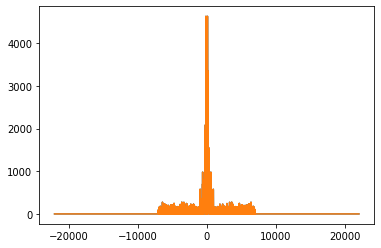

In [42]:
sampled_spectrum.scale(factor)
sampled_spectrum.plot()
spectrum.plot()


In [43]:
interpolated = sampled_spectrum.make_wave()
interpolated.make_audio()

Разница, действительно, получилось не очень большая.